In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/hackathon/hackathon')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import LabelEncoder

In [3]:
df_duration = pd.read_csv('updated_file_with_call_duration.csv')
df_ctone = pd.read_csv('customer sentiment.csv')   #ctone is customer tone

In [4]:
print(df_duration.head())
print(df_ctone.head())

      call_id  customer_id  agent_id  call_start_datetime  \
0  4667960400   2033123310    963118  2024-07-31 23:56:00   
1  1122072124   8186702651    519057  2024-08-01 00:03:00   
2  6834291559   2416856629    158319  2024-07-31 23:59:00   
3  2266439882   1154544516    488324  2024-08-01 00:05:00   
4  1211603231   5214456437    721730  2024-08-01 00:04:00   

  agent_assigned_datetime    call_end_datetime  \
0           8/1/2024 0:03  2024-08-01 00:34:00   
1           8/1/2024 0:06  2024-08-01 00:18:00   
2           8/1/2024 0:07  2024-08-01 00:26:00   
3           8/1/2024 0:10  2024-08-01 00:17:00   
4           8/1/2024 0:14  2024-08-01 00:23:00   

                                     call_transcript  call_duration  
0  \n\nAgent: Thank you for calling United Airlin...           38.0  
1  \n\nAgent: Thank you for calling United Airlin...           15.0  
2  \n\nAgent: Thank you for calling United Airlin...           27.0  
3  \n\nAgent: Thank you for calling United Airlin...

In [5]:
merged_df = pd.merge(df_duration, df_ctone, on='call_id')
print(merged_df.head())

      call_id  customer_id  agent_id_x  call_start_datetime  \
0  4667960400   2033123310      963118  2024-07-31 23:56:00   
1  1122072124   8186702651      519057  2024-08-01 00:03:00   
2  6834291559   2416856629      158319  2024-07-31 23:59:00   
3  2266439882   1154544516      488324  2024-08-01 00:05:00   
4  1211603231   5214456437      721730  2024-08-01 00:04:00   

  agent_assigned_datetime    call_end_datetime  \
0           8/1/2024 0:03  2024-08-01 00:34:00   
1           8/1/2024 0:06  2024-08-01 00:18:00   
2           8/1/2024 0:07  2024-08-01 00:26:00   
3           8/1/2024 0:10  2024-08-01 00:17:00   
4           8/1/2024 0:14  2024-08-01 00:23:00   

                                     call_transcript  call_duration  \
0  \n\nAgent: Thank you for calling United Airlin...           38.0   
1  \n\nAgent: Thank you for calling United Airlin...           15.0   
2  \n\nAgent: Thank you for calling United Airlin...           27.0   
3  \n\nAgent: Thank you for calling 

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
merged_df['tone_of_customer'] = label_encoder.fit_transform(merged_df['customer_tone'])

print(merged_df[['customer_tone', 'tone_of_customer']].head())

  customer_tone  tone_of_customer
0         angry                 0
1       neutral                 3
2        polite                 4
3    frustrated                 2
4        polite                 4


In [7]:
correlation = merged_df['call_duration'].corr(merged_df['tone_of_customer'])
print(f"Correlation between call_duration and tone_of_customer: {correlation}")

Correlation between call_duration and tone_of_customer: -0.0006511213021354063


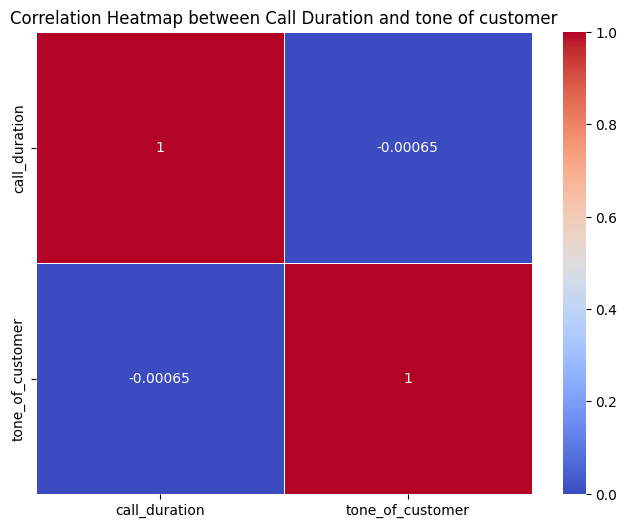

In [8]:
correlation_matrix = merged_df[['call_duration', 'tone_of_customer']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap between Call Duration and tone of customer')
plt.show()

Negetive correlation means that there is a slight tendency for call duration to decrease as the tone of the customer becomes more negative, but this effect is so small that it is likely insignificant. Other factors, such as the complexity of the issue, customer behavior, or specific call reason, might play a much larger role in determining call duration.